In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts
from datetime import datetime, timedelta
import os

In [5]:
directories = ["Binance_Historical_1m_FUTURES_9_days_2022-06-06T13:56:51", "Binance_Historical_1m_SPOT_9_days_2022-06-06T14:02:09"]

with os.scandir('raw_data/%s' % directories[0]) as entries:
  for entry in entries:
    filename_arr = entry.name.split("_")
    if filename_arr[0].startswith("BTCUS"):
      print(filename_arr)
      
with os.scandir('raw_data/%s' % directories[1]) as entries:
  for entry in entries:
    filename_arr = entry.name.split("_")
    if filename_arr[0].startswith("BTCUS"):
      print(filename_arr)

['BTCUSDT', 'FUTURES', '1m.csv']
['BTCUSDT', '220624', 'FUTURES', '1m.csv']
['BTCUSDT', 'SPOT', '1m.csv']
['BTCUSDP', 'SPOT', '1m.csv']
['BTCUSDC', 'SPOT', '1m.csv']


In [6]:
btcusdt_perp = pd.read_csv('raw_data/%s/%s' % (directories[0], "BTCUSDT_FUTURES_1m.csv"), parse_dates=["Date"], index_col="Date")
btcusdt_fut = pd.read_csv('raw_data/%s/%s' % (directories[0], "BTCUSDT_220624_FUTURES_1m.csv"), parse_dates=["Date"], index_col="Date")
btcusdt_spot = pd.read_csv('raw_data/%s/%s' % (directories[1], "BTCUSDT_SPOT_1m.csv"), parse_dates=["Date"], index_col="Date")

In [10]:
import scipy.stats as stats

In [37]:
btcusdt_perp = btcusdt_perp.loc["2022-06-01 08:00:00": "2022-06-04 08:00:00"].copy()
btcusdt_spot = btcusdt_spot.loc["2022-06-01 08:00:00": "2022-06-04 08:00:00"].copy()
btcusdt_fut = btcusdt_fut.loc["2022-06-01 08:00:00": "2022-06-04 08:00:00"].copy()

In [38]:
stats.pearsonr(btcusdt_spot.Close, btcusdt_fut.Close)

(0.9998783023554834, 0.0)

In [39]:
ts.coint(btcusdt_spot.Close, btcusdt_fut.Close)

(-4.892752008153338,
 0.00025798853907252377,
 array([-3.90024679, -3.33825239, -3.04592297]))

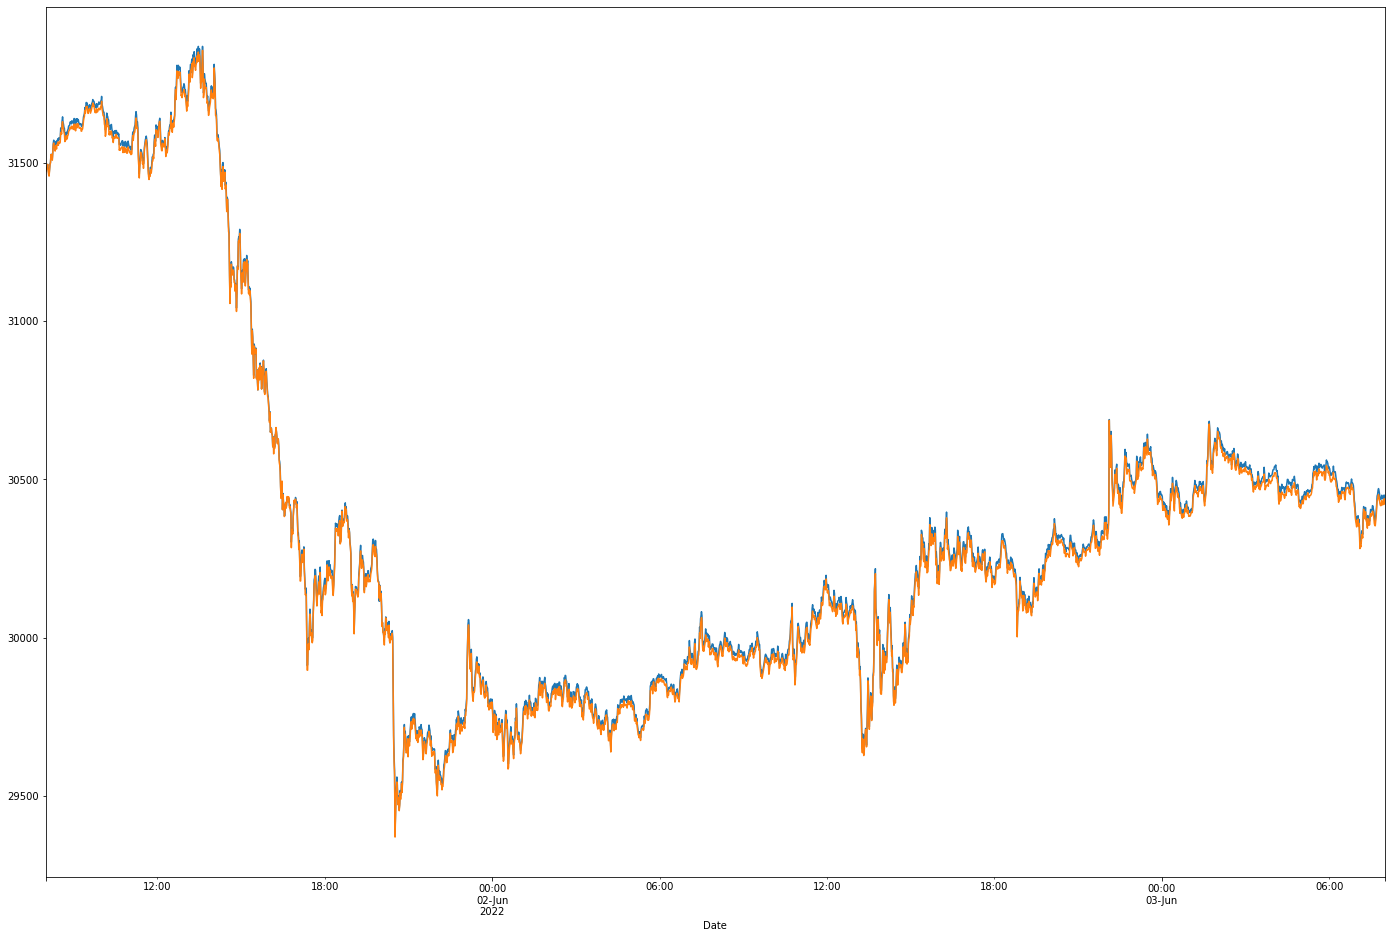

In [47]:
btcusdt_spot.Close.plot(figsize=(24, 16))
btcusdt_perp.Close.plot(figsize=(24, 16))
plt.show()